In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [4]:
cov_matrix = np.cov(scaled_data, rowvar=False)
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [5]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [0.02085386 0.14774182 0.9201649  2.93808505]
Eigenvectors:
 [[ 0.26128628  0.71956635  0.37741762 -0.52106591]
 [-0.12350962 -0.24438178  0.92329566  0.26934744]
 [-0.80144925 -0.14212637  0.02449161 -0.5804131 ]
 [ 0.52359713 -0.63427274  0.06694199 -0.56485654]]


In [6]:
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)

Sorted Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Sorted Eigenvectors:
 [[-0.52106591  0.37741762  0.71956635  0.26128628]
 [ 0.26934744  0.92329566 -0.24438178 -0.12350962]
 [-0.5804131   0.02449161 -0.14212637 -0.80144925]
 [-0.56485654  0.06694199 -0.63427274  0.52359713]]


In [7]:
n_components = 2
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
pca_data = np.dot(scaled_data, eigenvector_subset)
print("PCA transformed data:\n", pca_data)

PCA transformed data:
 [[ 2.26470281  0.4800266 ]
 [ 2.08096115 -0.67413356]
 [ 2.36422905 -0.34190802]
 [ 2.29938422 -0.59739451]
 [ 2.38984217  0.64683538]
 [ 2.07563095  1.48917752]
 [ 2.44402884  0.0476442 ]
 [ 2.23284716  0.22314807]
 [ 2.33464048 -1.11532768]
 [ 2.18432817 -0.46901356]
 [ 2.1663101   1.04369065]
 [ 2.32613087  0.13307834]
 [ 2.2184509  -0.72867617]
 [ 2.6331007  -0.96150673]
 [ 2.1987406   1.86005711]
 [ 2.26221453  2.68628449]
 [ 2.2075877   1.48360936]
 [ 2.19034951  0.48883832]
 [ 1.898572    1.40501879]
 [ 2.34336905  1.12784938]
 [ 1.914323    0.40885571]
 [ 2.20701284  0.92412143]
 [ 2.7743447   0.45834367]
 [ 1.81866953  0.08555853]
 [ 2.22716331  0.13725446]
 [ 1.95184633 -0.62561859]
 [ 2.05115137  0.24216355]
 [ 2.16857717  0.52714953]
 [ 2.13956345  0.31321781]
 [ 2.26526149 -0.3377319 ]
 [ 2.14012214 -0.50454069]
 [ 1.83159477  0.42369507]
 [ 2.61494794  1.79357586]
 [ 2.44617739  2.15072788]
 [ 2.10997488 -0.46020184]
 [ 2.2078089  -0.2061074 ]
 [ 2.

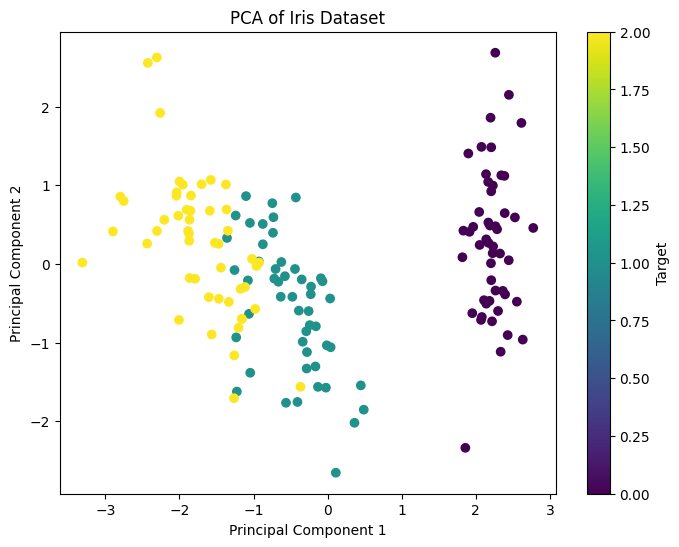

In [8]:
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['target'] = data.target

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Target')
plt.show()

# Using Sklearn for PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [11]:
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['target'] = data.target

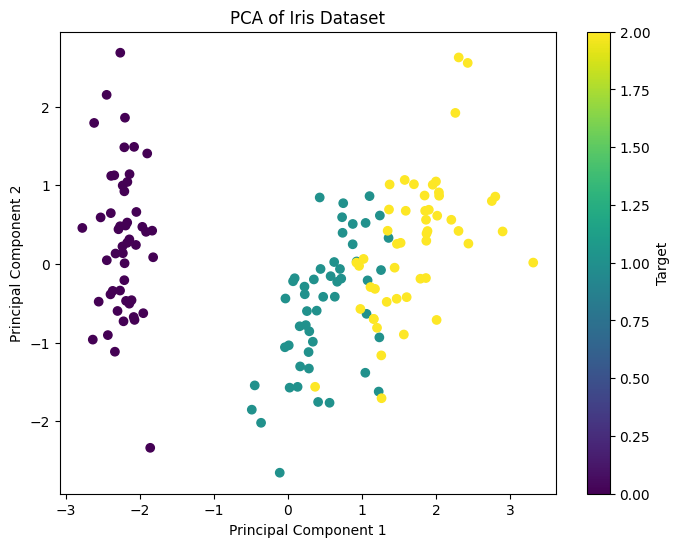

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Target')
plt.show()